In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [39]:
lyrics = pd.read_csv("lyrics.csv")
print("Number of songs: {:d}".format(lyrics.shape[0]))

Number of songs: 362237


## Exploratory Data Analysis

In [40]:
lyrics.head(1)

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."


### Which genre is the most popular?

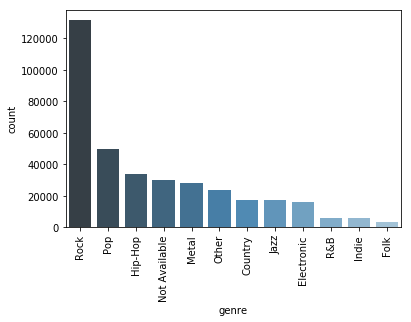

In [56]:
genres = lyrics['genre'].value_counts().reset_index()
genres.columns = ['genre', 'count']

sns.barplot(x='genre', y='count', data=genres, palette="Blues_d")
plt.xticks(rotation=90)
plt.show()

In [54]:
print("The most popular genre is {:s}, followed by {:s}.".format(genres['genre'][0], genres['genre'][1]))
print("The least popular genre is {:s}.".format(genres["genre"].iloc[-1]))

The most popular genre is Rock, followed by Pop.
The least popular genre is Folk.


### Which artist has the most songs?

Mean number of songs per artist: 19.87
Median number of songs per artist: 8.00


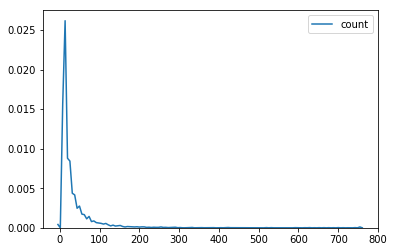

In [64]:
artists = lyrics['artist'].value_counts().reset_index()
artists.columns = ['artist', 'count']

print("Mean number of songs per artist: {:.2f}".format(artists['count'].mean()))
print("Median number of songs per artist: {:.2f}".format(artists['count'].median()))

sns.kdeplot(artists['count'])
plt.show()

In [62]:
print("The artist with the most songs in this dataset is {:s}.".format(artists['artist'][0]))

The artist with the most songs in this dataset is dolly-parton.
